10.0%. Run time:   0.25s. Est. time left: 00:00:00:02
20.0%. Run time:   0.53s. Est. time left: 00:00:00:02
30.0%. Run time:   0.79s. Est. time left: 00:00:00:01
40.0%. Run time:   1.05s. Est. time left: 00:00:00:01
50.0%. Run time:   1.38s. Est. time left: 00:00:00:01
60.0%. Run time:   1.73s. Est. time left: 00:00:00:01
70.0%. Run time:   2.02s. Est. time left: 00:00:00:00
80.0%. Run time:   2.28s. Est. time left: 00:00:00:00
90.0%. Run time:   2.56s. Est. time left: 00:00:00:00
100.0%. Run time:   2.81s. Est. time left: 00:00:00:00
Total run time:   2.82s


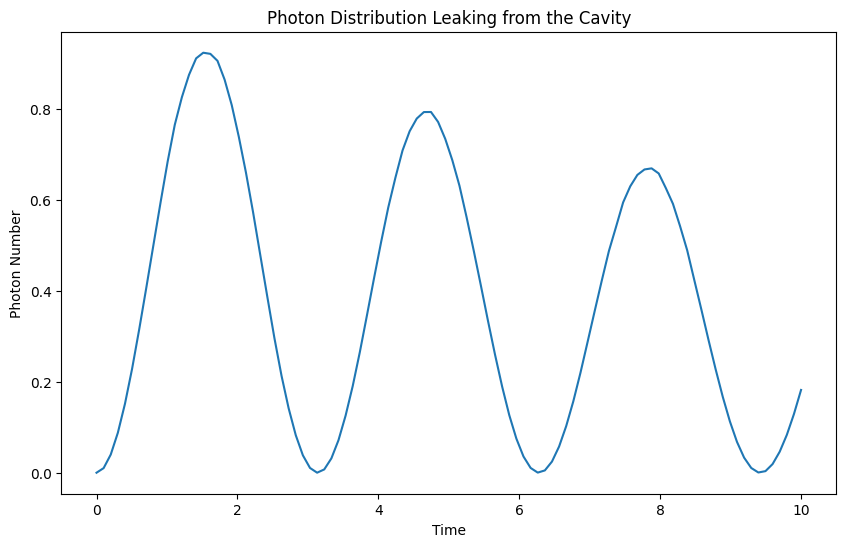

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
N = 10  # Number of cavity Fock states
kappa = 0.1 # Decay rate of the cavity
gamma = 0.05  # Decay rate of the atom
n_photons = 5  # Number of photons in the Fock state source
timesteps = 100  # Number of time steps
delta_t = 0.1  # Time step size

# Operators
a = tensor(destroy(N), qeye(2))  # Cavity annihilation operator
sigmap = tensor(qeye(N), create(2))  # Atomic excitation operator
sigmam = tensor(qeye(N), destroy(2))  # Atomic de-excitation operator

# Hamiltonian for the system
H_atom = 0.5 * gamma * sigmap * sigmam
H_cavity = 0.5 * kappa * (a.dag() * a)
H_coupling = sigmap * a.dag() + sigmam * a
H = H_atom + H_cavity + H_coupling

# Initial state
psi0 = tensor(basis(N, 0), basis(2, 0))

# Fock state source
source_state = fock(N, n_photons)

# Time evolution
tlist = np.linspace(0, timesteps * delta_t, timesteps)

# Define the collapse operators
c_ops = [np.sqrt(kappa) * a]

# Monte Carlo solver
output_states = mcsolve(H, psi0, tlist, c_ops, [a.dag() * a])

# Plotting photon distribution
plt.figure(figsize=(10, 6))
plt.plot(tlist, output_states.expect[0])
plt.title('Photon Distribution Leaking from the Cavity')
plt.xlabel('Time')
plt.ylabel('Photon Number')
plt.show()


### Atomic Excitation

This code modification plots both the photon number in the cavity and the population of the atom's excited state over time. This can help visualize how the energy is shared between the cavity and the atom.

10.0%. Run time:   0.34s. Est. time left: 00:00:00:03
20.0%. Run time:   0.65s. Est. time left: 00:00:00:02
30.0%. Run time:   0.94s. Est. time left: 00:00:00:02
40.0%. Run time:   1.24s. Est. time left: 00:00:00:01
50.0%. Run time:   1.61s. Est. time left: 00:00:00:01
60.0%. Run time:   1.95s. Est. time left: 00:00:00:01
70.0%. Run time:   2.35s. Est. time left: 00:00:00:01
80.0%. Run time:   2.66s. Est. time left: 00:00:00:00
90.0%. Run time:   2.95s. Est. time left: 00:00:00:00
100.0%. Run time:   3.31s. Est. time left: 00:00:00:00
Total run time:   3.32s


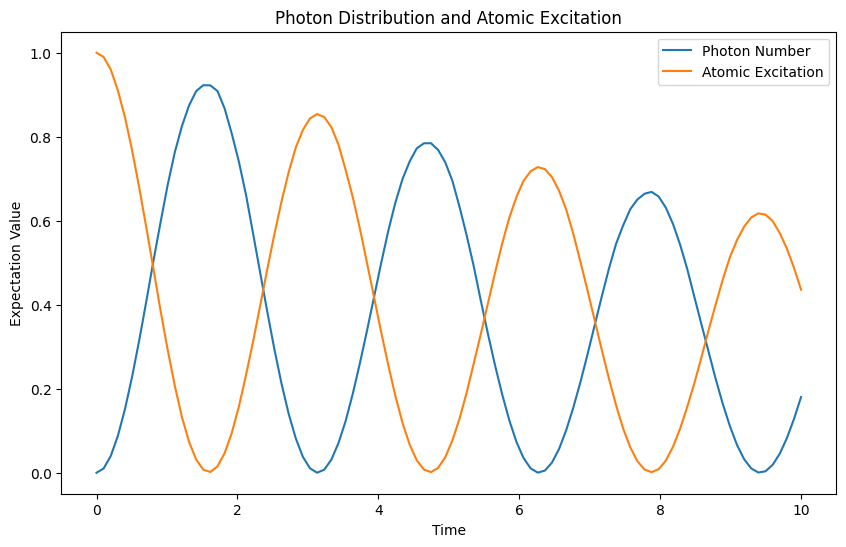

In [4]:
# Monte Carlo solver
output_states = mcsolve(H, psi0, tlist, c_ops, [a.dag() * a, sigmap.dag() * sigmap])

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(tlist, output_states.expect[0], label='Photon Number')
plt.plot(tlist, output_states.expect[1], label='Atomic Excitation')
plt.title('Photon Distribution and Atomic Excitation')
plt.xlabel('Time')
plt.ylabel('Expectation Value')
plt.legend()
plt.show()


### Varying Decay Rates
Different levels of dissipation affect the photon leakage and the overall system dynamics

10.0%. Run time:   0.27s. Est. time left: 00:00:00:02
20.0%. Run time:   0.61s. Est. time left: 00:00:00:02
30.0%. Run time:   0.94s. Est. time left: 00:00:00:02
40.0%. Run time:   1.20s. Est. time left: 00:00:00:01
50.0%. Run time:   1.51s. Est. time left: 00:00:00:01
60.0%. Run time:   1.81s. Est. time left: 00:00:00:01
70.0%. Run time:   2.12s. Est. time left: 00:00:00:00
80.0%. Run time:   2.38s. Est. time left: 00:00:00:00
90.0%. Run time:   2.66s. Est. time left: 00:00:00:00
100.0%. Run time:   3.04s. Est. time left: 00:00:00:00
Total run time:   3.05s
10.0%. Run time:   0.26s. Est. time left: 00:00:00:02
20.0%. Run time:   0.53s. Est. time left: 00:00:00:02
30.0%. Run time:   0.79s. Est. time left: 00:00:00:01
40.0%. Run time:   1.05s. Est. time left: 00:00:00:01
50.0%. Run time:   1.30s. Est. time left: 00:00:00:01
60.0%. Run time:   1.57s. Est. time left: 00:00:00:01
70.0%. Run time:   1.85s. Est. time left: 00:00:00:00
80.0%. Run time:   2.16s. Est. time left: 00:00:00:00
90.

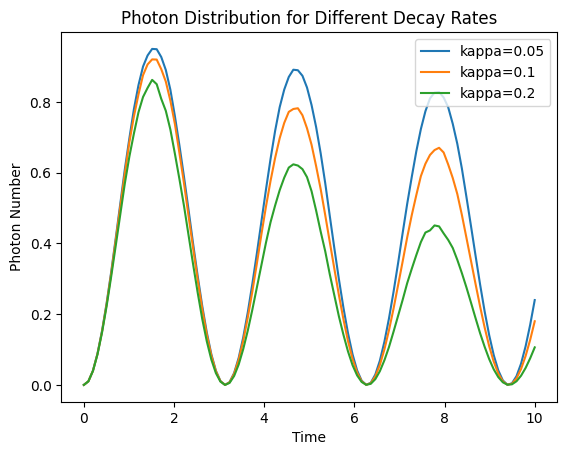

In [3]:
kappa_values = [0.05, 0.1, 0.2]
for kappa in kappa_values:
    c_ops = [np.sqrt(kappa) * a]
    output_states = mcsolve(H, psi0, tlist, c_ops, [a.dag() * a])
    plt.plot(tlist, output_states.expect[0], label=f'kappa={kappa}')

plt.title('Photon Distribution for Different Decay Rates')
plt.xlabel('Time')
plt.ylabel('Photon Number')
plt.legend()
plt.show()

### Inclusion of Atomic Decay
Both cavity and atomic decay processes can be simulated by including the atomic decay operator (`np.sqrt(gamma) * sigmam`). This offers a more thorough view of the system's energy dissipation.

10.0%. Run time:   0.44s. Est. time left: 00:00:00:04
20.0%. Run time:   0.84s. Est. time left: 00:00:00:03
30.0%. Run time:   1.23s. Est. time left: 00:00:00:02
40.0%. Run time:   1.56s. Est. time left: 00:00:00:02
50.0%. Run time:   1.88s. Est. time left: 00:00:00:01
60.0%. Run time:   2.25s. Est. time left: 00:00:00:01
70.0%. Run time:   2.59s. Est. time left: 00:00:00:01
80.0%. Run time:   2.99s. Est. time left: 00:00:00:00
90.0%. Run time:   3.39s. Est. time left: 00:00:00:00
100.0%. Run time:   3.72s. Est. time left: 00:00:00:00
Total run time:   3.72s


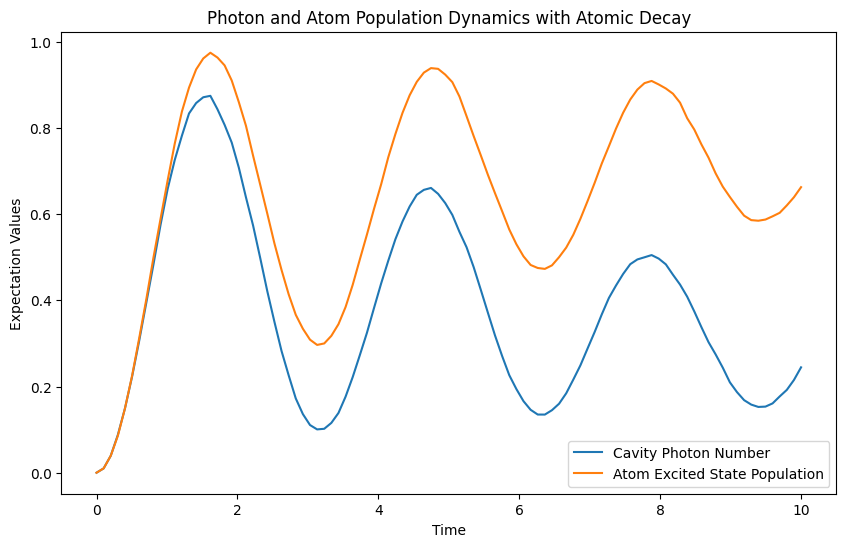

In [4]:
c_ops = [np.sqrt(kappa) * a, np.sqrt(gamma) * sigmam]
output_states = mcsolve(H, psi0, tlist, c_ops, [a.dag() * a, sigmap * sigmam])

plt.figure(figsize=(10, 6))
plt.plot(tlist, output_states.expect[0], label='Cavity Photon Number')
plt.plot(tlist, output_states.expect[1], label='Atom Excited State Population')
plt.title('Photon and Atom Population Dynamics with Atomic Decay')
plt.xlabel('Time')
plt.ylabel('Expectation Values')
plt.legend()
plt.show()

### Population Dynamics
The oscillation of the ground state population is counter-phased with respect to the quantity of photons. The ground state population is low when the photon number is large, and vice versa. Because of the decay processes, the ground state population does not approach zero, suggesting that the atom is never in the excited state during the whole simulation.

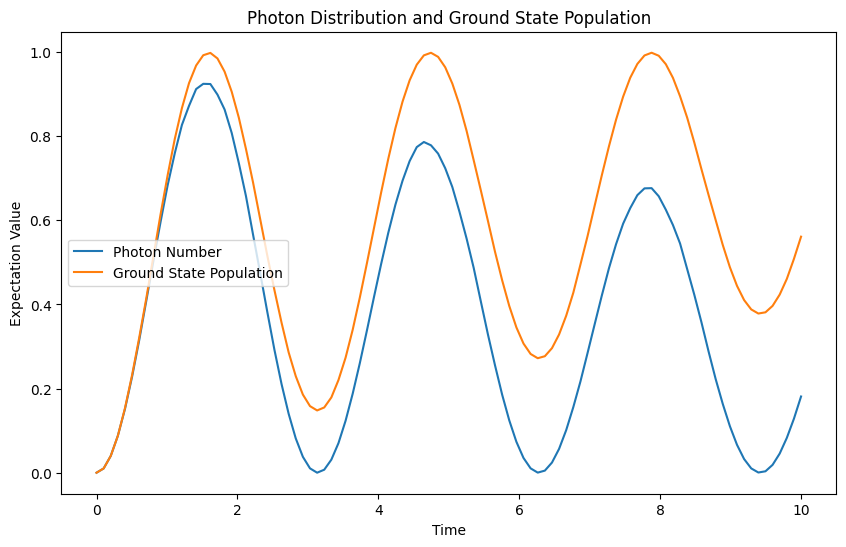

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(tlist, output_states.expect[0], label='Photon Number')
plt.plot(tlist, 1 - output_states.expect[1], label='Ground State Population')  # Calculate ground state population
plt.title('Photon Distribution and Ground State Population')
plt.xlabel('Time')
plt.ylabel('Expectation Value')
plt.legend()
plt.show()